In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats
import datetime

plt.style.use('fivethirtyeight')

# Q1

We define $\mathbb{1}$ or $\vec{\mathbb{1}}$ as a 'One Vector', with corresponding number of elements one.

## Q1.1

We construct the Lagrangian,

$$L(x,\lambda) = \frac{1}{2}w^T\Sigma w + \lambda \bigg(m - w^T \mu\bigg) + \gamma \bigg(1 - w^T \mathbb{1}\bigg)$$

F.O.C. w.r.t. $w, \lambda, \gamma$

$$\frac{\partial L}{\partial w}=\Sigma w -\lambda \mu - \gamma \mathbb{1}$$

$$\frac{\partial L}{\partial \lambda}=m - w^T \mu$$

$$\frac{\partial L}{\partial \gamma}=1 - w^T \mathbb{1}$$

Taking partial derivatives first, we set them to be zero. (The Question asks only the partial derivatives, so no more steps further)

## Q1.2

There is a litter trick of sovling those three equations. 

We let,

- $A = \mathbb{1}^T \Sigma^{-1} \mathbb{1}$
- $ B = \mathbb{1}^T \Sigma^{-1} \mu = \mu \Sigma^{-1} \mathbb{1}$
- $C = \mu^T \Sigma^{-1} \mu$

Then,

F.O.C. w.r.t. each parameters,


$$w^* = \frac{1}{AC-B^2}\Sigma^{-1}\bigg(  (C-Bm)\vec{\mathbb{1}}+(Am-B)\mu \bigg)$$

$$w^* = \frac{1}{AC-B^2}\Sigma^{-1}\bigg( (A\mu - \vec{\mathbb{1}}B)m + (\vec{\mathbb{1}}C-B\mu) \bigg)$$

## Q1.3

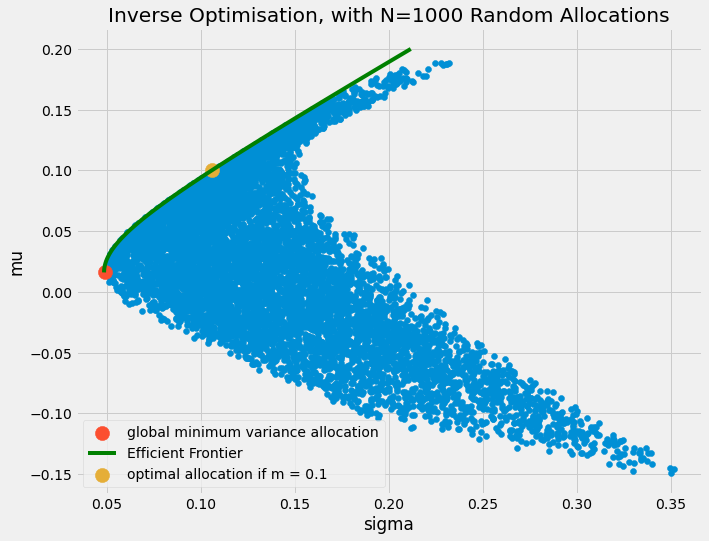

In [2]:
N = 8_000

# randomly create 1000 sets of allocation weights
# initialise those parameters
mu = np.array([0.02, 0.07, 0.15, 0.20])
sigma = np.array([0.05, 0.12, 0.17, 0.25])
R = np.array([[1, 0.3, 0.3, 0.3],[0.3, 1, 0.6, 0.6],[0.3, 0.6, 1, 0.6],[0.3, 0.6, 0.6, 1]])
Sigma = np.diag(sigma) @ R @ np.diag(sigma)
One = np.ones(4)
A = One.T @ np.linalg.inv(Sigma) @ One
B = One.T @ np.linalg.inv(Sigma) @ mu
C = mu.T @ np.linalg.inv(Sigma) @ mu

def cal_w_star(m):
    return 1/(A*C - B**2) * np.linalg.inv(Sigma) @ ( (C - B*m)*One + (A*m - B)*mu )

# calculate Sigma as the Variance-Covariance Matrix
Sigma = np.diag(sigma) @ R @ np.diag(sigma) 
# 4 rows * 1000 cols
w_random_allocation = np.random.rand(4,N)
# make those weights sum to be one
w_random_allocation[3,:] = 1 - w_random_allocation[:3,:].sum(axis = 0) 


mu_allocation = w_random_allocation.T @ mu
sigma_allocation = np.sqrt((w_random_allocation.T @ Sigma @ w_random_allocation).diagonal())


########
# plot
plt.figure(figsize=(10,8))
# inverse optimisation
plt.scatter(x=sigma_allocation, y=mu_allocation)
# optimal allocation 
# plt.scatter(x=sigma_star, y= mu_star, s= 200, label = 'optimal allocations')
# global minimum variance allocation
plt.scatter(x = sigma_allocation.min(), y = mu_allocation[sigma_allocation.argmin()], s= 200,\
            label='global minimum variance allocation')

# formula calculated frontier
m_list = np.linspace(mu_allocation[sigma_allocation.argmin()], 0.2 ,100)
frontier_list = []
for m in m_list:
    frontier_list.append(cal_w_star(m))
frontier_list = np.array(frontier_list)
sigma_list = np.diag(np.sqrt(frontier_list @ Sigma @ frontier_list.T))
plt.plot(sigma_list, m_list, color = 'green', label = 'Efficient Frontier')

plt.scatter(x =np.sqrt(cal_w_star(0.1).T @ Sigma @ cal_w_star(0.1) ), y= cal_w_star(0.1).T @ mu , s = 200, label = 'optimal allocation if m = 0.1')

plt.xlabel('sigma')
plt.ylabel('mu')
plt.title('Inverse Optimisation, with N=1000 Random Allocations')
plt.legend()
plt.show()

The above scatter-plot shapes like a curve, showing the relationship between return ( $\mu_{\pi}$ ) and standard deviation ( $\sigma_{\pi}$ ) of 1000 randomly generated allocation. 

- The very left point of the curve is the **global minimum variance allocation**. It shows the minimum possibly achievable allocation given the returns ( $\mu$ ), standard deviation ( $\sigma$ ), and correlation matrix ( $R$ ).
- The left frontier represents the lowest possible standard deviation allocation at each level of return for each portfolio.
- The left frontier above global minimum variance allocation part is called the **efficient frontier** (see the green curve), because it represents the maximum level of allocation return at each level of allocation standard deviations.
- The standard deviation, x-axis, captures risks of each allocation.

Through the 'inverse optimisation', the generate large amount of random allocations to view the relationship between allocation returns and risks (see the efficient frontier).

The cell (also the figure) below shows the 'non-inverse' optimisation. Given each level of return, $m$, we could calculate the optimal weights and then get it's standard deviation at that weight's allocation. 

**P.S.**

As the red point shows in the plot above
. We set the allocation return, $m = 0.1$, the Lagrangian Minimisation gives the `argmin` value of weights, and it's corresponding s.d..

The Orange point shows the optimal allocation if we requare the portfolio return $\mu$ to be 0.1.

# Q2
## Q2.1

$$\max_w \frac{w^T \mu - r_f}{ \sqrt{w^T \Sigma w}}$$

$$s.t. \quad \mathbb{1}^T w =1$$

$$s.t. w \geq 0 $$

,where $\mu_p$ is the portfolio returns, $\sigma_p$ is the portfolio variance, $w_i$ is the $i^th$ element of the weight vector.

However, it seems the objective function, the sharpe ratio, is **not convex**!

***Through a convex reformulation, we reform the optimisation problem to be:***

$$ \min_{w} \frac{1}{2} w^T \Sigma w $$

$$s.t. \quad w^T (\mu - r_f \mathbb{1}) = 1$$
$$  \mathbb{1}^T w \geq 0  $$


## Q2.2

Here, we maximise the sharpe ratio, subject to the "weights-sum-to-be-one" constraint.

$$\max_{w} \frac{w^T \mu - r_f}{\sqrt{w^T \Sigma w}}$$

$$s.t. \quad w^T \mathbb{1} =1$$

, where $r_f$ is a the risk free rate here, and is a scalar.

Thus, we build the Lagrangian,

$$L(w,\lambda, \gamma) = \frac{w^T \mu - r_f}{ \sqrt{w^T \Sigma w}} + \lambda (w^T\mathbb{1}-1) $$

, where the last term $\gamma w$ is a complete slackness condition. As the question is asking only about the Lagrangian and Partial Derivatives, I won't discuss that here.

F.O.C. w.r.t. each parameters,

$$\frac{\partial L}{\partial w} = \frac{\mu \sqrt{w^T \Sigma w} - (w^T \mu - r_f)\frac{2}{2\sqrt{w^T \Sigma w}}\Sigma w}{w^T\Sigma w} + \lambda \mathbb{1}$$

$$\frac{\partial L}{\partial \lambda}= w^T\mathbb{1} -1$$

We can finally solve it, and 

$$w_m^* = \frac{ \Sigma^{-1}(\mu - r_f \mathbb{1}) }{\mathbb{1}^T \Sigma^{-1}(\mu - r_f \mathbb{1})}$$

## Q2.3

$$w_m^* = \frac{ \Sigma^{-1}(\mu - r_f \mathbb{1}) }{\mathbb{1}^T \Sigma^{-1}(\mu - r_f \mathbb{1})}$$

In [3]:
def cal_w_m(rf):
    return (np.linalg.inv(Sigma)@(mu - rf*One))/(One.T @ np.linalg.inv(Sigma)@(mu - rf * One))
def cal_mu_m(rf):
    return mu.T @ cal_w_m(rf)
def cal_sigma_m(rf):
    return np.sqrt(cal_w_m(rf).T @ Sigma @ cal_w_m(rf))
def cal_y(x, rf):
    slope = (cal_mu_m(rf) - rf)/cal_sigma_m(rf)
    return rf + slope * x


Q2_table =pd.DataFrame(np.zeros([4,5]), \
             columns=['risk_free_rate','Sharpe_Ratio','mu','sigma','weights'])
Q2_table.risk_free_rate = [0.005, 0.01, 0.015, 0.0175]
Q2_table.weights = Q2_table.risk_free_rate.apply(cal_w_m)
Q2_table.mu = Q2_table.risk_free_rate.apply(cal_mu_m)
Q2_table.sigma = Q2_table.risk_free_rate.apply(cal_sigma_m)
Q2_table.Sharpe_Ratio = (Q2_table.mu - Q2_table.risk_free_rate)/Q2_table.sigma
print(Q2_table.round(4))


   risk_free_rate  Sharpe_Ratio      mu   sigma  \
0          0.0050        0.9214  0.1861  0.1965   
1          0.0100        0.9015  0.3261  0.3507   
2          0.0150        0.8931  1.7765  1.9724   
3          0.0175       -0.8933 -1.2988  1.4735   

                                             weights  
0  [0.01683520154101969, -0.22936698195619756, 0....  
1  [-0.7459371100527575, -0.5105693717886, 1.4902...  
2  [-8.644854051636658, -3.422571141254978, 8.489...  
3  [8.103502472263084, 2.751850516034935, -6.3514...  


The Table Above shows the risk-free rate at each level, and their corresponding Sharpe Ratio, weights of allocations, portfolio means, and standard deviation.

**Note that**: 
In the normal case that $\mu > r_f$, we got positive Sharpe ratio.
However, if $\mu < r_f$ (for example $r_f = 0.0175$ as the last row the table above shows), then the tangency porfolio would have a negative Sharpe Ratio, because investors would like to short the tangency portfolio and long the Risk-free Asset.

/var/folders/90/hk9jz15n56zckxcy3wlt2twh0000gn/T/ipykernel_26334/2820949124.py:11: RuntimeWarning: invalid value encountered in sqrt
  sigma_list = np.diag(np.sqrt(frontier_list @ Sigma @ frontier_list.T))


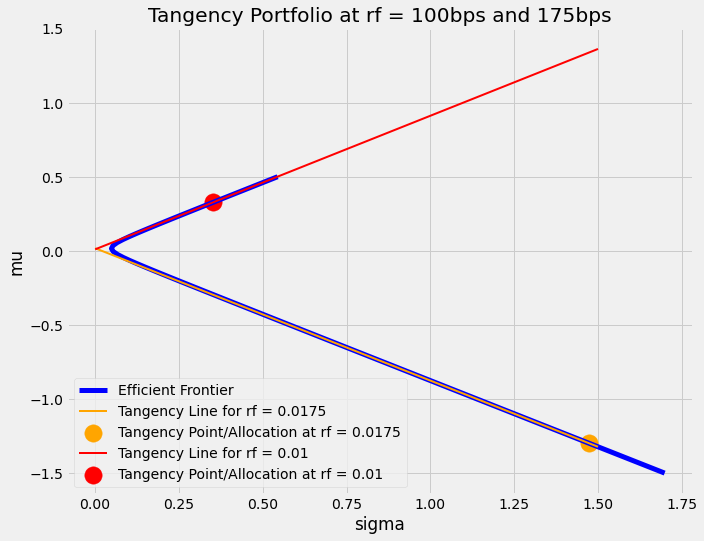

In [4]:
x= np.linspace(0,1.5, 100)
# plot
plt.figure(figsize=[10,8])

# frontier
m_list = np.linspace(-1.5, 0.5 ,100)
frontier_list = []
for m in m_list:
    frontier_list.append(cal_w_star(m))
frontier_list = np.array(frontier_list)
sigma_list = np.diag(np.sqrt(frontier_list @ Sigma @ frontier_list.T))
plt.plot(sigma_list, m_list, color = 'blue', label = 'Efficient Frontier', linewidth=5)

# tengency line for rf = 0.0175%
rf = 0.0175
# plt.scatter(x=cal_sigma_m(rf) , y=cal_mu_m(rf), s= 300,color = 'green')
plt.plot(x, cal_y(x, rf) , color = 'orange' , label = f'Tangency Line for rf = {rf}', linewidth=2)
plt.scatter(x=cal_sigma_m(rf) , y=cal_mu_m(rf), s= 300, color = 'orange', label = f'Tangency Point/Allocation at rf = {rf}')

# tengency line for rf = 0.01%
rf = 0.01
plt.plot(x, cal_y(x, rf) , color = 'red', label = f'Tangency Line for rf = {rf}', linewidth=2)
plt.scatter(x=cal_sigma_m(rf) , y=cal_mu_m(rf), s= 300, color = 'red', label = f'Tangency Point/Allocation at rf = {rf}')

plt.xlabel('sigma')
plt.ylabel('mu')
plt.title('Tangency Portfolio at rf = 100bps and 175bps')
plt.legend()
plt.show()

The Figure above shows the tangency allocaiton and the tangency line at rf = 100bps and 175bps.

**Note that**: 
In the normal case that $\mu > r_f$, we got positive Sharpe ratio (Slope of the Tangency Line).
However, if $\mu < r_f$ (for example $r_f = 0.0175$ as the last row the table above shows), then the tangency porfolio would have a negative Sharpe Ratio (Slope of the Tangency Line), because investors would like to short the tangency portfolio and long the Risk-free Asset.

# Q3

## Q3.1

uS =  110.00000000000001
dS =  90.0


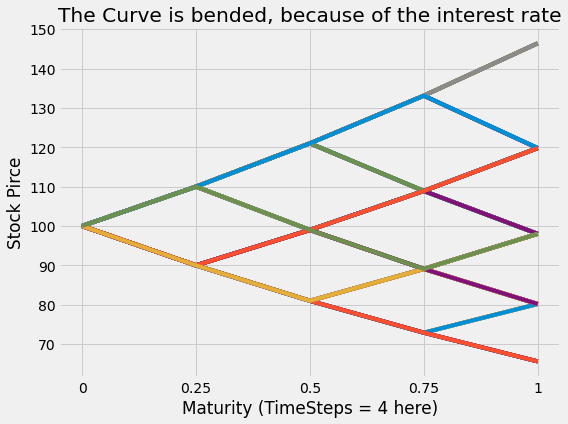

In [5]:
S = 100
r = 0.05 # e^r continuously compounding
E = 100 # strike price
T = 1
sigma = 0.2 
TimeStep =4
dt = T/TimeStep

u = 1 + sigma * np.sqrt(dt)
d = 1 - sigma * np.sqrt(dt)
pp = (1 + r*dt - d)/(u-d)  # p'

print(f'uS = ', u*S)
print(f'dS = ', d*S)

N = 100

S_list_all = []
for i in range(N):
    S = 100
    S_list_each = [S]
    for j in range(TimeStep):
        S = S * np.random.choice([u,d])
        S_list_each.append(S)
    S_list_all.append(S_list_each)
    
Price_matrix = np.vstack(S_list_all)
Price_matrix = np.round(Price_matrix,2)

plt.figure(figsize=(8,6))
plt.plot( Price_matrix.T )
plt.title('The Curve is bended, because of the interest rate')
plt.xticks([0,1,2,3,4],[0,0.25, 0.5, 0.75, 1])
plt.xlabel('Maturity (TimeSteps = 4 here)')
plt.ylabel('Stock Pirce')
plt.show()

Figure above shows the potential movements of stock price, starting from 100, ending in 4 periods. 

$$ u = 1+\sigma \times \sqrt{\delta t} $$
$$ d = 1-\sigma \times \sqrt{\delta t} $$
$$ p' = \frac{1+r\times \delta t -d}{u-d}$$


We let $\sigma = 0.2$, $\delta t = 0.25$, with $T=1$ as the maturity, and $timesteps = 4$.

So, we get $u=1.1$, $v=0.9$ in this question.

By the way, we can find that the tree is bended upward a little bit, because of the continuously compounded interest rate.

## Q3.2

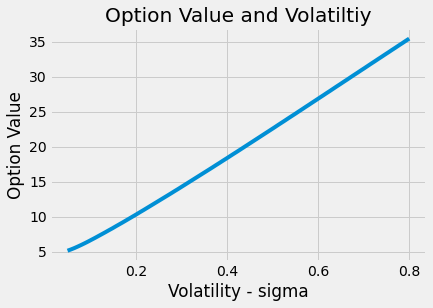

In [6]:
# Create a user defined function
def binomial_option(spot, strike, rate, sigma, time, steps, output=0):
    
    """
    binomial_option(spot, strike, rate, sigma, time, steps, output=0)
    
    Function to calculate binomial option pricing for european call option
    
    Params
    ------
    spot       -int or float    - spot price
    strike     -int or float    - strike price
    rate       -float           - interest rate
    sigma      -float           - standard deviation
    time       -int or float    - expiration time
    steps      -int             - number of time steps
    output     -int             - [0: price, 1: payoff, 2: option value, 3: option delta]
    
    Returns
    --------
    out: ndarray
    An array object of price, payoff, option value and delta as specified by the output flag
    
    """
    
    # define parameters
    ts = time / steps
    u  = 1 + sigma*np.sqrt(ts) 
    v  = 1 - sigma*np.sqrt(ts)
    p  = 0.5 + rate *np.sqrt(ts) / (2*sigma)
    df = 1/(1+rate*ts)
    
    # initialize the arrays
    px = np.zeros((steps+1, steps+1))
    cp = np.zeros((steps+1, steps+1))
    V = np.zeros((steps+1, steps+1))
    d = np.zeros((steps+1, steps+1))
    
    # binomial loop : forward loop
    for j in range(steps+1):
        for i in range(j+1):
            px[i,j] = spot * np.power(v,i) * np.power(u,j-i)
            cp[i,j] = np.maximum(px[i,j] - strike, 0)
         
    # reverse loop
    for j in range(steps+1, 0, -1):
        for i in range(j):
            if (j==steps+1):
                V[i,j-1] = cp[i,j-1]
                d[i,j-1] = 0 
            else:
                V[i,j-1] = df*(p*V[i,j]+(1-p)*V[i+1,j])
                d[i,j-1] = (V[i,j]-V[i+1,j])/(px[i,j]-px[i+1,j])
    
    results = np.around(px,2), np.around(cp,2), np.around(V,2), np.around(d,4)

    return results[output]


#############

volatility = np.linspace(0.05, 0.8, 100)
option_val = []
for i in volatility:
    option_val.append( binomial_option(100,100,0.05, i ,1,4,2)[0,0] )
    
plt.plot(volatility, option_val)
plt.xlabel('Volatility - sigma')
plt.ylabel('Option Value')
plt.title('Option Value and Volatiltiy')
plt.show()

The figure above shows the relationship between volatility and option value. It could be found that the option value increases with the volatility $\sigma$ increase.

P.S. We here let $\sigma$ represents the volatiltiy of the underlying.

## Q3.3

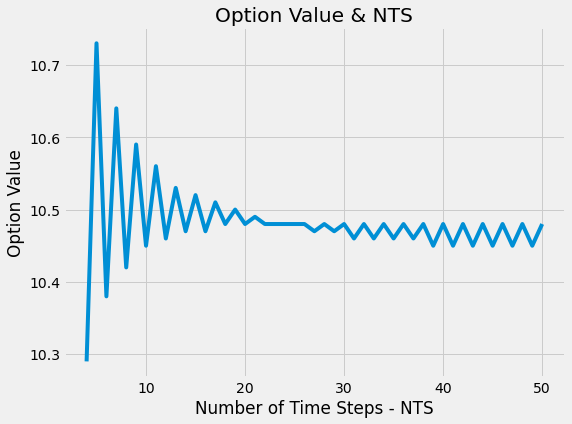

In [7]:
NTS = np.arange(4,51,1)
option_val = []
for i in NTS:
    option_val.append( binomial_option(100,100,0.05, 0.2 ,1,i,2)[0,0] )
    
plt.figure(figsize=(8,6))
plt.plot(NTS, option_val)
plt.xlabel('Number of Time Steps - NTS')
plt.ylabel('Option Value')
plt.title('Option Value & NTS')
plt.show()

The figure above shows the relationship between option value and the number of time steps. As the number of time steps incerases, the value of option goes to fluctuate around 10.45 and 10.48. As the NTS incerases, the calculation of option become more continuous.

# Q4

## Q4.1


In [8]:
Q4_Table = pd.DataFrame([99.95, 99.75, 99.5, 99.25, 99, 98.5, 98, 97.5], columns=['Percentile'])/100
Q4_Table['z'] = Q4_Table.apply(scipy.stats.norm.ppf)
print("Here below is the table of the percentile and it's corresponding z-value")
print(Q4_Table)

Here below is the table of the percentile and it's corresponding z-value
   Percentile         z
0      0.9995  3.290527
1      0.9975  2.807034
2      0.9950  2.575829
3      0.9925  2.432379
4      0.9900  2.326348
5      0.9850  2.170090
6      0.9800  2.053749
7      0.9750  1.959964


## Q4.2



$$VaR(X) = \mu + \sigma\cdot \Phi^{-1}(1-c)$$

$$ES_c(X) = \mu - \sigma\frac{ \phi\big(\Phi^{-1}(1-c)\big)}{1-c}$$


In [9]:
mu = 0
sigma = 1

def Value_at_Risk(c, mu=mu, sigma=sigma):
    return mu + sigma * scipy.stats.norm.ppf(1-c)

def expected_shortfall(c, mu=mu, sigma=sigma):
    es = mu - sigma * (  scipy.stats.norm.pdf(scipy.stats.norm.ppf(1-c))  )/(1-c)
    return es

In [10]:
Q4_Table = pd.DataFrame([99.95, 99.75, 99.5, 99.25, 99, 98.5, 98, 97.5], columns=['Percentile'])/100
Q4_Table['z'] = Q4_Table.apply(scipy.stats.norm.ppf)
Q4_Table['VaR_c'] = Q4_Table.Percentile.apply(Value_at_Risk)
Q4_Table['ES_c'] = Q4_Table.Percentile.apply(expected_shortfall)

print("Here, the table shows the VaR and Expected Shortfall for each level of confidence.")
print(Q4_Table)

Here, the table shows the VaR and Expected Shortfall for each level of confidence.
   Percentile         z     VaR_c      ES_c
0      0.9995  3.290527 -3.290527 -3.554381
1      0.9975  2.807034 -2.807034 -3.104357
2      0.9950  2.575829 -2.575829 -2.891949
3      0.9925  2.432379 -2.432379 -2.761240
4      0.9900  2.326348 -2.326348 -2.665214
5      0.9850  2.170090 -2.170090 -2.524695
6      0.9800  2.053749 -2.053749 -2.420907
7      0.9750  1.959964 -1.959964 -2.337803


# Q5
## Q5. Bullet Point 1

$$\mu_{10d} = 10 \mu_{1d}$$
$$\sigma_{10d} =  \sigma_{1d}\sqrt{10}$$

$$rate_{10d} \sim N(\mu_{10d}, \sigma_{10d}^2)$$


In [11]:
c = 99
df = pd.read_csv('Data_SP500.csv')
df['Date']= pd.to_datetime(df.Date, format='%d/%m/%Y')
df['rate'] = np.log((df.SP500.shift(-1)/df.SP500))
df['rolling21d_std'] = df.rate.rolling(21).std()

print('The Rolling Standard Deviation sigma_t from 21 daily returns is:')
# print(df[['Date','rolling21d_std']].tail(10))
print(df[['Date','SP500','rate','rolling21d_std']].tail(10))

The Rolling Standard Deviation sigma_t from 21 daily returns is:
           Date        SP500      rate  rolling21d_std
1240 2017-12-21  2684.570068 -0.000458        0.004046
1241 2017-12-22  2683.340088 -0.001059        0.004084
1242 2017-12-26  2680.500000  0.000791        0.004066
1243 2017-12-27  2682.620117  0.001832        0.003594
1244 2017-12-28  2687.540039 -0.005197        0.003837
1245 2017-12-29  2673.610107  0.008269        0.003848
1246 2018-01-02  2695.810059  0.006378        0.003968
1247 2018-01-03  2713.060059  0.004021        0.003975
1248 2018-01-04  2723.989990  0.007009        0.003958
1249 2018-01-05  2743.149902       NaN             NaN


/Users/mie/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Here, the table above shows the rolling standard deviation $\sigma_t$ from 21 daily returns, as the `rolling21d_std` column of the table.

## Q5. Bullet Point 2

In [12]:
df['std_1d'] = df['rolling21d_std'] * np.sqrt(1)
df['std_10d'] = df['std_1d'] * np.sqrt(10)
df['rate_10d'] = np.log((df.SP500.shift(-10)/df.SP500))
df = df.dropna()

print('The projected 10-day standard deviation is:')
# print(df[['Date','std_10d']].tail(10))
print(df[['Date','std_10d']].tail(10))

The projected 10-day standard deviation is:
           Date   std_10d
1230 2017-12-07  0.013652
1231 2017-12-08  0.013267
1232 2017-12-11  0.013165
1233 2017-12-12  0.013231
1234 2017-12-13  0.013533
1235 2017-12-14  0.013543
1236 2017-12-15  0.013035
1237 2017-12-18  0.013146
1238 2017-12-19  0.013272
1239 2017-12-20  0.012820


/Users/mie/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


The table above shows the 10-day standard deviation, as the column `std_10d`.

$$ \sigma_{10D} = \sigma_t \sqrt{10} $$

## Q5. Bullet Point 3

$$VaR(rate_{10d}) = \sigma_{10d}\cdot \Phi^{-1}(1-c) =\Phi^{-1}(1-c) \times \sigma_T \times \sqrt{10} $$


$$r_{10D,t+10} < VaR_{10D,t} $$

,where $r_{10D,t+10}$ means the 10-day return in next 10 days (t+10). In the backtesting, we have the realised data already, so we could directly use 'next 10 day' return as $r_{10D,t+10}$.

, where $VaR_{10D,t}$ is the Value at Risks at time $t$, used to estimate the next 10 days' loss, in $t+10$.

In [13]:
def Value_at_Risk(c, sigma):
    c = c/100
    return  sigma * scipy.stats.norm.ppf(1-c)

df['VaR'] = Value_at_Risk(c, df.std_10d)
# print(df[['Date','VaR']].tail(10))
print(df[['Date','VaR']].tail(10))

           Date       VaR
1230 2017-12-07 -0.031760
1231 2017-12-08 -0.030864
1232 2017-12-11 -0.030626
1233 2017-12-12 -0.030780
1234 2017-12-13 -0.031482
1235 2017-12-14 -0.031507
1236 2017-12-15 -0.030324
1237 2017-12-18 -0.030583
1238 2017-12-19 -0.030876
1239 2017-12-20 -0.029824


The table above shows the $VaR_{10D,t}$, as the column `VaR`.


## Q5.Report (a)


In [14]:
df['VaR_breaches'] = 0
df.loc[df.VaR > df.rate_10d, 'VaR_breaches']=1

print('The number of VaR breaches is:', df.VaR_breaches.sum())
print(f'The percentage of VaR breaches is: {round(df.VaR_breaches.sum()/len(df),4)*100}%')
print('Those VaR breaches are:')
print('-'*50)
print(df.loc[df.VaR_breaches==1,['Date','rate_10d','VaR']])

The number of VaR breaches is: 27
The percentage of VaR breaches is: 2.21%
Those VaR breaches are:
--------------------------------------------------
           Date  rate_10d       VaR
135  2013-08-05 -0.036435 -0.035856
141  2013-08-13 -0.038313 -0.030732
250  2014-01-17 -0.054088 -0.038144
251  2014-01-21 -0.049246 -0.038071
252  2014-01-22 -0.051851 -0.040578
379  2014-07-24 -0.040241 -0.037861
417  2014-09-17 -0.028074 -0.026444
418  2014-09-18 -0.032948 -0.026336
425  2014-09-29 -0.053515 -0.043929
426  2014-09-30 -0.049148 -0.048349
468  2014-11-28 -0.032058 -0.028134
469  2014-12-01 -0.031568 -0.023855
470  2014-12-02 -0.046457 -0.024116
471  2014-12-03 -0.030067 -0.023479
641  2015-08-07 -0.052714 -0.048449
642  2015-08-10 -0.105652 -0.047795
643  2015-08-11 -0.109663 -0.047171
644  2015-08-12 -0.072322 -0.047186
645  2015-08-13 -0.047038 -0.045620
646  2015-08-14 -0.050334 -0.046532
647  2015-08-17 -0.063959 -0.046591
648  2015-08-18 -0.091353 -0.047853
649  2015-08-19 -0.064

The table above shows those VaR breaches. In those date, as column `Date` of the table, 10-day returns is below the VaR_t quantity. 

$$r_{10D,t+10} < VaR_{10D,t}$$

There are 27 VaR breaches in total, and account for about 2.21% days.

## Q5.Report (b)

In [15]:
consecutive_var = df[ (df.VaR_breaches.diff()==0) & (df.VaR_breaches==1)]

temp = consecutive_var.index.to_list()
temp1 = (consecutive_var.index+1).to_list()
temp.extend(temp1)
temp = list(set(temp)) # delete those duplicated, and sort
temp.sort()
consecutive_var = df.loc[temp]

print('The Number of consecutive VaR Breaches is: ', len(consecutive_var))
print(f'The percentage of VaR breaches is: {round(len(consecutive_var)/len(df)*100,2)}%')
print('-'*50)
print('Those VaR breaches are:')
print(consecutive_var[['SP500','rate_10d','VaR']])

The Number of consecutive VaR Breaches is:  22
The percentage of VaR breaches is: 1.8%
--------------------------------------------------
Those VaR breaches are:
            SP500  rate_10d       VaR
251   1843.800049 -0.049246 -0.038071
252   1844.859985 -0.051851 -0.040578
253   1828.459961 -0.030559 -0.052180
418   2011.359985 -0.032948 -0.026336
419   2010.400024 -0.021367 -0.029386
426   1972.290039 -0.049148 -0.048349
427   1946.160034 -0.043944 -0.048390
469   2053.439941 -0.031568 -0.023855
470   2066.550049 -0.046457 -0.024116
471   2074.330078 -0.030067 -0.023479
472   2071.919922 -0.005173 -0.022351
642   2104.179932 -0.105652 -0.047795
643   2084.070068 -0.109663 -0.047171
644   2086.050049 -0.072322 -0.047186
645   2083.389893 -0.047038 -0.045620
646   2091.540039 -0.050334 -0.046532
647   2102.439941 -0.063959 -0.046591
648   2096.919922 -0.091353 -0.047853
649   2079.610107 -0.064936 -0.058024
650   2035.729980 -0.042446 -0.075913
1144  2480.909912 -0.021405 -0.018489
11

The table above shows those **Consecutive** VaR breaches. In those date, as column `Date` of the table, 10-day returns is below the VaR_t quantity in two consecutive days.

There are 22 VaR breaches in total, and account for about 1.8% days.

## Q5.Report (c)

Those VaR Breaches days are:
0    2014-01-21
1    2014-01-22
2    2014-01-23
3    2014-09-18
4    2014-09-19
5    2014-09-30
6    2014-10-01
7    2014-12-01
8    2014-12-02
9    2014-12-03
10   2014-12-04
11   2015-08-10
12   2015-08-11
13   2015-08-12
14   2015-08-13
15   2015-08-14
16   2015-08-17
17   2015-08-18
18   2015-08-19
19   2015-08-20
20   2017-08-07
21   2017-08-08
dtype: datetime64[ns]
--------------------------------------------------
Those consecutive VaR Breaches days are:
0    2014-01-21
1    2014-01-22
2    2014-01-23
3    2014-09-18
4    2014-09-19
5    2014-09-30
6    2014-10-01
7    2014-12-01
8    2014-12-02
9    2014-12-03
10   2014-12-04
11   2015-08-10
12   2015-08-11
13   2015-08-12
14   2015-08-13
15   2015-08-14
16   2015-08-17
17   2015-08-18
18   2015-08-19
19   2015-08-20
20   2017-08-07
21   2017-08-08
dtype: datetime64[ns]


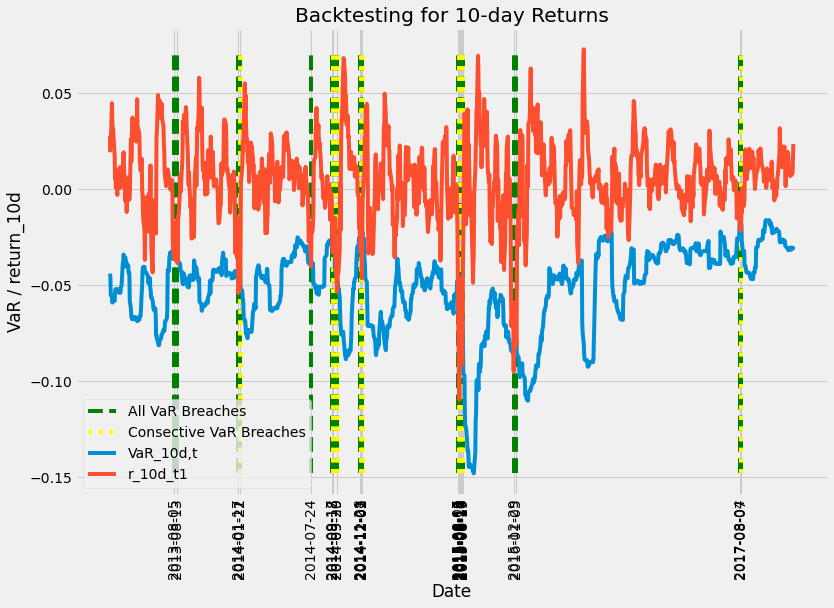

In [16]:
ymax = np.max(df[['VaR','rate_10d']].max())
ymin = np.min(df[['VaR','rate_10d']].min())


print('Those VaR Breaches days are:')
print(pd.Series(consecutive_var.Date.values))
print('-'*50)
print('Those consecutive VaR Breaches days are:')
print(pd.Series(consecutive_var.Date.values))


plt.figure(figsize=(12,8))

plt.vlines(x=df.loc[df.VaR_breaches == 1, 'Date'], \
           ymin = ymin, \
           ymax = ymax, \
           colors='green', \
           linestyles='dashed', \
           label='All VaR Breaches')
plt.vlines(x=consecutive_var.Date, \
           ymin = ymin, \
           ymax = ymax, \
           colors='yellow', \
           linestyles='dotted', \
           label='Consective VaR Breaches')

plt.plot(df.Date,df.VaR, label = 'VaR_10d,t')
plt.plot(df.Date,df.rate_10d, label = 'r_10d_t1')

plt.xticks(df.loc[df.VaR_breaches == 1, 'Date'], rotation = 90)

plt.legend()
# plt.xticks(df.index,df.Date.dt.year , rotation = 45)
plt.xlabel('Date')
plt.ylabel('VaR / return_10d')
plt.title('Backtesting for 10-day Returns')
plt.show()

The figure above shows:
- all **VaR Breaches** as the **green vertical lines**, and 
- **consecutive VaR Breaches** as the **yellow vertical lines**. 
- The **red curve** represents the **10-day return**, $r_{10D,t+10}$, and 
- **blue curve** represents the **VaR 99%/10days**, $VaR_{10D,t}$.

As 10-day returns go below than the VaR curve, there are the VaR breaches, and Green Vertical Lines show up. When there are consective VaR breaches, Yellow Vertical Lines are shown.

The figure cannot fully show those days of breaches in the x-axis. If you want clear date, please zoom the figure size, or please see those printed dates shown above the figure.


# Q6

$$\sigma^2_{t+1|t} = \lambda \sigma^2_{t|t-1} + (1-\lambda) r^2_t$$

----

$$VaR(rate_{10d}) = \sigma_{10d}\cdot \Phi^{-1}(1-c) =\Phi^{-1}(1-c) \times \sigma_T \times \sqrt{10} $$


$$r_{10D,t+10} < VaR_{10D,t} $$

,where $r_{10D,t+10}$ means the 10-day return in next 10 days (t+10). In the backtesting, we have the realised data already, so we could directly use 'next 10 day' return as $r_{10D,t+10}$.

, where $VaR_{10D,t}$ is the Value at Risks at time $t$, used to estimate the next 10 days' loss, in $t+10$.

In [17]:
c = 99
df2 = pd.read_csv('Data_SP500.csv')
df2['Date']= pd.to_datetime(df2.Date, format='%d/%m/%Y')
df2['rate'] = np.log((df2.SP500.shift(-1)/df2.SP500))

lam = 0.72
df2['EWMA_var'] = var_init = df2.rate.var()

for i in range(len(df2.index)):
    if i == len(df2.index)-1:
        break
    df2.loc[df2.index[i+1],'EWMA_var'] = \
        lam * df2.loc[df2.index[i],'EWMA_var']\
        + (1-lam)*np.square(df2.loc[ df2.index[i] ,'rate'])
    
df2['EWMA_std_10d'] = np.sqrt(df2.EWMA_var * 10)

df2['rate_10d'] = np.log((df2.SP500.shift(-10)/df2.SP500))
df2 = df2.dropna()
print(df2[['Date', 'SP500', 'rate', 'EWMA_std_10d']].tail(10))

/Users/mie/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


           Date        SP500      rate  EWMA_std_10d
1230 2017-12-07  2636.979980  0.005491      0.010897
1231 2017-12-08  2651.500000  0.003197      0.013035
1232 2017-12-11  2659.989990  0.001548      0.012286
1233 2017-12-12  2664.110107 -0.000473      0.010742
1234 2017-12-13  2662.850098 -0.004079      0.009149
1235 2017-12-14  2652.010010  0.008934      0.010337
1236 2017-12-15  2675.810059  0.005348      0.017333
1237 2017-12-18  2690.159912 -0.003235      0.017217
1238 2017-12-19  2681.469971 -0.000828      0.015580
1239 2017-12-20  2679.250000  0.001984      0.013292


The code block and the table above shows the calculation of the new EWMA variance and **EWMA standard deviation**.

$$\sigma^2_{t+1|t} = \lambda \sigma^2_{t|t-1} + (1-\lambda) r^2_t$$

$$EWMA\ s.d. =\sigma_{t+1|t} = \sqrt{\sigma^2_{t+1|t} }$$

## Q6.(a)

In [18]:
def Value_at_Risk(c, sigma):
    c = c/100
    return  sigma * scipy.stats.norm.ppf(1-c)

df2['VaR'] = Value_at_Risk(c, df2.EWMA_std_10d)

df2['VaR_breaches'] = 0
df2.loc[df2.VaR > df2.rate_10d, 'VaR_breaches']=1

print('The number of VaR breaches is:', df2.VaR_breaches.sum())
print(f'The percentage of VaR breaches is: {round(df2.VaR_breaches.sum()/len(df2),4)*100}%')
print('Those VaR breaches are:')
print('-'*50)
print(df2.loc[df2.VaR_breaches==1,['Date','rate_10d','VaR']])

The number of VaR breaches is: 32
The percentage of VaR breaches is: 2.58%
Those VaR breaches are:
--------------------------------------------------
           Date  rate_10d       VaR
141  2013-08-13 -0.038313 -0.025793
142  2013-08-14 -0.030379 -0.029786
244  2014-01-09 -0.026371 -0.026187
245  2014-01-10 -0.033563 -0.023962
250  2014-01-17 -0.054088 -0.043329
251  2014-01-21 -0.049246 -0.038314
252  2014-01-22 -0.051851 -0.032588
379  2014-07-24 -0.040241 -0.034942
468  2014-11-28 -0.032058 -0.020597
470  2014-12-02 -0.046457 -0.036688
526  2015-02-24 -0.034295 -0.028682
527  2015-02-25 -0.035448 -0.024520
529  2015-02-27 -0.024581 -0.021640
641  2015-08-07 -0.052714 -0.036226
642  2015-08-10 -0.105652 -0.058303
643  2015-08-11 -0.109663 -0.062007
644  2015-08-12 -0.072322 -0.052745
645  2015-08-13 -0.047038 -0.045030
646  2015-08-14 -0.050334 -0.041121
647  2015-08-17 -0.063959 -0.040335
648  2015-08-18 -0.091353 -0.035722
649  2015-08-19 -0.064936 -0.044272
719  2015-11-27 -0.037

*While appling EWMA variance/standard deviation to calculate VaR,*


The table above shows those VaR breaches. In those date, as column `Date` of the table, 10-day returns is below the VaR_t quantity. 

$$r_{10D,t+10} < VaR_{10D,t}$$

There are 32 VaR breaches in total, and account for about 2.58% days.

## Q6.(b)

In [19]:
consecutive_var = df2[ (df2.VaR_breaches.diff()==0) & (df2.VaR_breaches==1)]

temp = consecutive_var.index.to_list()
temp1 = (consecutive_var.index+1).to_list()
temp.extend(temp1)
temp = list(set(temp)) # delete those duplicated, and sort
temp.sort()
consecutive_var = df2.loc[temp]

print('The Number of consecutive VaR Breaches is: ', len(consecutive_var))
print(f'The percentage of VaR breaches is: {round(len(consecutive_var)/len(df)*100,2)}%')
print('-'*50)
print('Those VaR breaches are:')
print(consecutive_var[['SP500','rate_10d','VaR']])

The Number of consecutive VaR Breaches is:  24
The percentage of VaR breaches is: 1.97%
--------------------------------------------------
Those VaR breaches are:
            SP500  rate_10d       VaR
142   1685.390015 -0.030379 -0.029786
143   1661.319946 -0.014033 -0.061435
245   1842.369995 -0.033563 -0.023962
246   1819.199951 -0.014786 -0.053297
251   1843.800049 -0.049246 -0.038314
252   1844.859985 -0.051851 -0.032588
253   1828.459961 -0.030559 -0.044417
527   2113.860107 -0.035448 -0.024520
528   2110.739990 -0.021448 -0.021586
642   2104.179932 -0.105652 -0.058303
643   2084.070068 -0.109663 -0.062007
644   2086.050049 -0.072322 -0.052745
645   2083.389893 -0.047038 -0.045030
646   2091.540039 -0.050334 -0.041121
647   2102.439941 -0.063959 -0.040335
648   2096.919922 -0.091353 -0.035722
649   2079.610107 -0.064936 -0.044272
650   2035.729980 -0.042446 -0.091120
741   2063.360107 -0.071053 -0.064718
742   2043.939941 -0.083432 -0.066112
743   2012.660034 -0.067478 -0.082164
1

*While appling EWMA variance/standard deviation to calculate VaR,*


The table above shows those **Consecutive** VaR breaches. In those date, as column `Date` of the table, 10-day returns is below the VaR_t quantity in two consecutive days.

There are 24 VaR breaches in total, and account for about 1.97% days.

## Q6.(c)

Those VaR Breaches days are:
0    2013-08-14
1    2013-08-15
2    2014-01-10
3    2014-01-13
4    2014-01-21
5    2014-01-22
6    2014-01-23
7    2015-02-25
8    2015-02-26
9    2015-08-10
10   2015-08-11
11   2015-08-12
12   2015-08-13
13   2015-08-14
14   2015-08-17
15   2015-08-18
16   2015-08-19
17   2015-08-20
18   2015-12-30
19   2015-12-31
20   2016-01-04
21   2017-08-04
22   2017-08-07
23   2017-08-08
dtype: datetime64[ns]
--------------------------------------------------
Those consecutive VaR Breaches days are:
0    2013-08-14
1    2013-08-15
2    2014-01-10
3    2014-01-13
4    2014-01-21
5    2014-01-22
6    2014-01-23
7    2015-02-25
8    2015-02-26
9    2015-08-10
10   2015-08-11
11   2015-08-12
12   2015-08-13
13   2015-08-14
14   2015-08-17
15   2015-08-18
16   2015-08-19
17   2015-08-20
18   2015-12-30
19   2015-12-31
20   2016-01-04
21   2017-08-04
22   2017-08-07
23   2017-08-08
dtype: datetime64[ns]


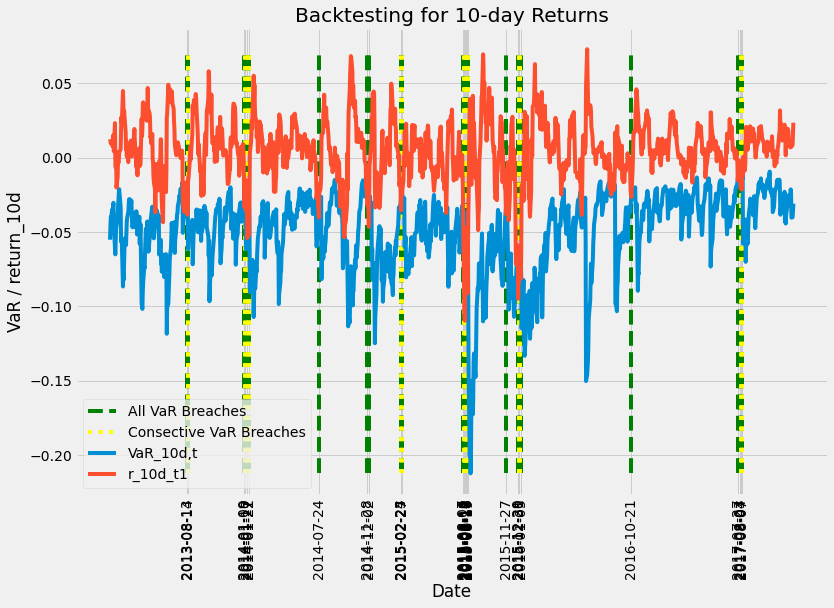

In [20]:
ymax = np.max(df2[['VaR','rate_10d']].max())
ymin = np.min(df2[['VaR','rate_10d']].min())


print('Those VaR Breaches days are:')
print(pd.Series(consecutive_var.Date.values))
print('-'*50)
print('Those consecutive VaR Breaches days are:')
print(pd.Series(consecutive_var.Date.values))


plt.figure(figsize=(12,8))

plt.vlines(x=df2.loc[df2.VaR_breaches == 1, 'Date'], \
           ymin = ymin, \
           ymax = ymax, \
           colors='green', \
           linestyles='dashed', \
           label='All VaR Breaches')
plt.vlines(x=consecutive_var.Date, \
           ymin = ymin, \
           ymax = ymax, \
           colors='yellow', \
           linestyles='dotted', \
           label='Consective VaR Breaches')

plt.plot(df2.Date,df2.VaR, label = 'VaR_10d,t')
plt.plot(df2.Date,df2.rate_10d, label = 'r_10d_t1')

plt.xticks(df2.loc[df2.VaR_breaches == 1, 'Date'], rotation = 90)

plt.legend()
# plt.xticks(df.index,df.Date.dt.year , rotation = 45)
plt.xlabel('Date')
plt.ylabel('VaR / return_10d')
plt.title('Backtesting for 10-day Returns')
plt.show()

*While appling EWMA variance/standard deviation to calculate VaR,*


The figure above shows:
- all **VaR Breaches** as the **green vertical lines**, and 
- **consecutive VaR Breaches** as the **yellow vertical lines**. 
- The **red curve** represents the **10-day return**, $r_{10D,t+10}$, and 
- **blue curve** represents the **VaR 99%/10days**, $VaR_{10D,t}$.

As 10-day returns go below than the VaR curve, there are the VaR breaches, and Green Vertical Lines show up. When there are consective VaR breaches, Yellow Vertical Lines are shown.

The figure cannot fully show those days of breaches in the x-axis. If you want clear date, please zoom the figure size, or please see those printed dates shown above the figure.

There are relatively more days of VaR breaches and percentage, compared with using the Q5 method.

## P.S. Additional

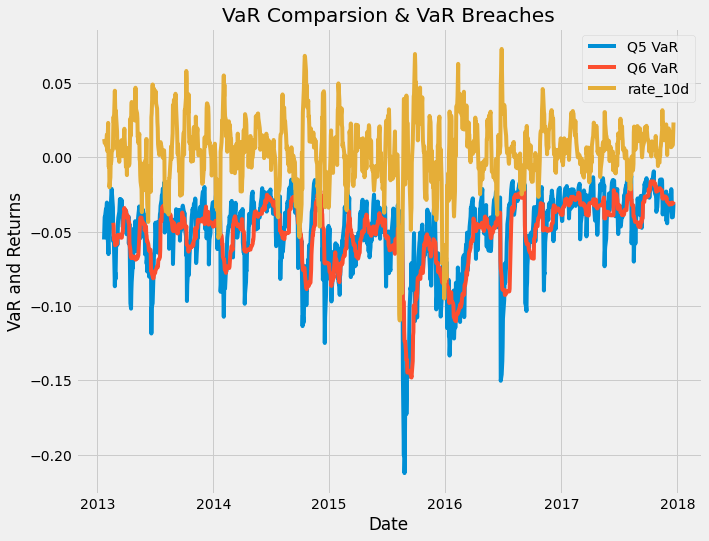

In [21]:
plt.figure(figsize=(10,8))

plt.plot(df2.Date, df2.VaR, label = 'Q5 VaR')
plt.plot(df.Date, df.VaR, label = 'Q6 VaR')
plt.plot(df2.Date, df2.rate_10d, label = 'rate_10d')

plt.legend()
plt.xlabel('Date')
plt.ylabel('VaR and Returns')

plt.title('VaR Comparsion & VaR Breaches')

plt.show()

This figure above shows the the VaR calculated through standard deviation in Q5 and Q6, as the blue and red curves respectively. The yellow curve captures the 10-day returns. Once returns touch those VaRs or go below those VaRs, then those days are VaR breaches.

There are relatively more days of VaR breaches and percentage, compared with using the Q5 method.